In [1]:
%load_ext google.cloud.bigquery

In [6]:
%%bigquery
SELECT
  *
FROM
  `bigquery-public-data.new_york_taxi_trips.taxi_zone_geom`
LIMIT 10

Downloading: 100%|██████████| 10/10 [00:01<00:00,  8.52rows/s]


,zone_id,zone_name,borough,zone_geom
0,1,Newark Airport,EWR,"POLYGON((-74.1856319999999 40.6916479999999, -..."
1,3,Allerton/Pelham Gardens,Bronx,"POLYGON((-73.848596761 40.8716707849999, -73.8..."
2,18,Bedford Park,Bronx,"POLYGON((-73.8844286139999 40.8668003789999, -..."
3,20,Belmont,Bronx,"POLYGON((-73.8839239579998 40.8644177609999, -..."
4,31,Bronx Park,Bronx,"POLYGON((-73.8710017319999 40.8572767429999, -..."
5,32,Bronxdale,Bronx,"POLYGON((-73.8566377469999 40.8581191719999, -..."
6,46,City Island,Bronx,MULTIPOLYGON(((-73.7812278233202 40.8560877891...
7,47,Claremont/Bathgate,Bronx,"POLYGON((-73.8906903199999 40.8543532619999, -..."
8,51,Co-Op City,Bronx,"POLYGON((-73.8209760119998 40.868949787, -73.8..."
9,58,Country Club,Bronx,"POLYGON((-73.8155011882058 40.8483111954905, -..."


# Number of trips in 2022

In [8]:
%%bigquery
SELECT COUNT(*)
FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2022`

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.29s/rows]


,f0_
0,36256539


## Average distance

In [3]:
%%bigquery
SELECT AVG(trip_distance) as avg_trip_distance
FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2022`

Query executing stage S00: Input and status COMPLETE : 0.01s:   0%|          | 0/2 [00:00<?, ?query/s]

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.21s/rows]


,avg_trip_distance
0,6.077670271


## average fee

In [4]:
%%bigquery
SELECT AVG(total_amount) AS avg_fare
FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2022`

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.22s/rows]


,avg_fare
0,21.401159324


## group by month

In [3]:
%%bigquery trips
SELECT 
    EXTRACT(MONTH FROM pickup_datetime) AS month,
    COUNT(*) AS trips
FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2022`
GROUP BY month
ORDER BY month;

Query complete after 0.01s: 100%|██████████| 1/1 [00:00<00:00, 1001.03query/s]


Downloading: 100%|██████████| 12/12 [00:01<00:00,  6.59rows/s]


In [25]:
trips

,month,trips
0,1,2463954
1,2,2979419
2,3,3627887
3,4,3599902
4,5,3588291
5,6,3557691
6,7,3174362
7,8,3152694
8,9,3183783
9,10,3675811


<Axes: title={'center': 'Trips by month for 2022'}, xlabel='month'>

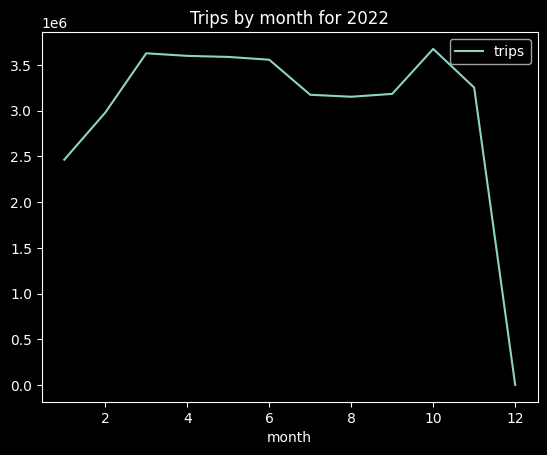

In [10]:
from pandas import DataFrame

trips:DataFrame = trips
trips.plot(x='month', y='trips', title='Trips by month for 2022')

In [31]:
%%bigquery trips_diff
SELECT 
    EXTRACT(MONTH FROM pickup_datetime) AS month,
    COUNT(*) AS trips,    
    COUNT(*) - (SELECT AVG(trips) FROM 
        (SELECT COUNT(*) AS trips
         FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2021`
         GROUP BY EXTRACT(MONTH FROM pickup_datetime))
        ) AS trip_diff
FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2021`
GROUP BY month
ORDER BY month;

Downloading: 100%|██████████| 12/12 [00:01<00:00,  9.53rows/s]


In [32]:
trips_diff

,month,trips,trip_diff
0,1,1370004,-1.205354e+06
1,2,1371700,-1.203658e+06
2,3,1925132,-6.502261e+05
3,4,2171215,-4.041431e+05
4,5,2507075,-6.828308e+04
5,6,2834203,2.588449e+05
6,7,2822112,2.467539e+05
7,8,2788300,2.129419e+05
8,9,2963778,3.884199e+05
9,10,3463484,8.881259e+05


<Axes: title={'center': 'Variation in number of trips by month for 2021'}, xlabel='month'>

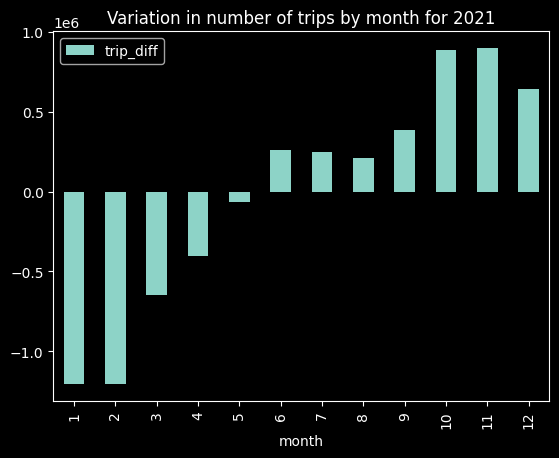

In [34]:
trips_diff.plot(x='month', y='trip_diff', kind='bar', title='Variation in number of trips by month for 2021')

In [10]:
%%bigquery
SELECT table_name, column_name, data_type, udt_name
FROM `johannesvc.INFORMATION_SCHEMA.COLUMNS`
ORDER BY table_name, column_name;

Executing query with job ID: 74a78693-5681-4acc-99bf-e1d1bda94821
Query executing: 0.66s


ERROR:
 400 Unrecognized name: udt_name at [1:44]

Location: EU
Job ID: 74a78693-5681-4acc-99bf-e1d1bda94821

